# Fitting max-stable PCA to max-linear models

In [1]:
library(evd)
library(maxstablePCA)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(421421)
s <- 200

In [3]:
A1 <- matrix(
    c(
        6/10, 4 / 10, 1/10, 6 / 17, 6 / 18, 
        3 / 10, 4 / 10, 1 / 10, 3 / 17, 4 / 18, 
        1 / 10, 2 / 10, 8 / 10, 8 / 17, 8 / 18
     ), 
    5, 3
)

In [4]:
A1

0.6000000,0.3000000,0.1000000
0.4000000,0.4000000,0.2000000
0.1000000,0.1000000,0.8000000
0.3529412,0.1764706,0.4705882
0.3333333,0.2222222,0.4444444


In [5]:
Z1 <- matrix(rfrechet(30000), 10000, 3)
X1 <- t(maxmatmul(A1, t(Z1)))

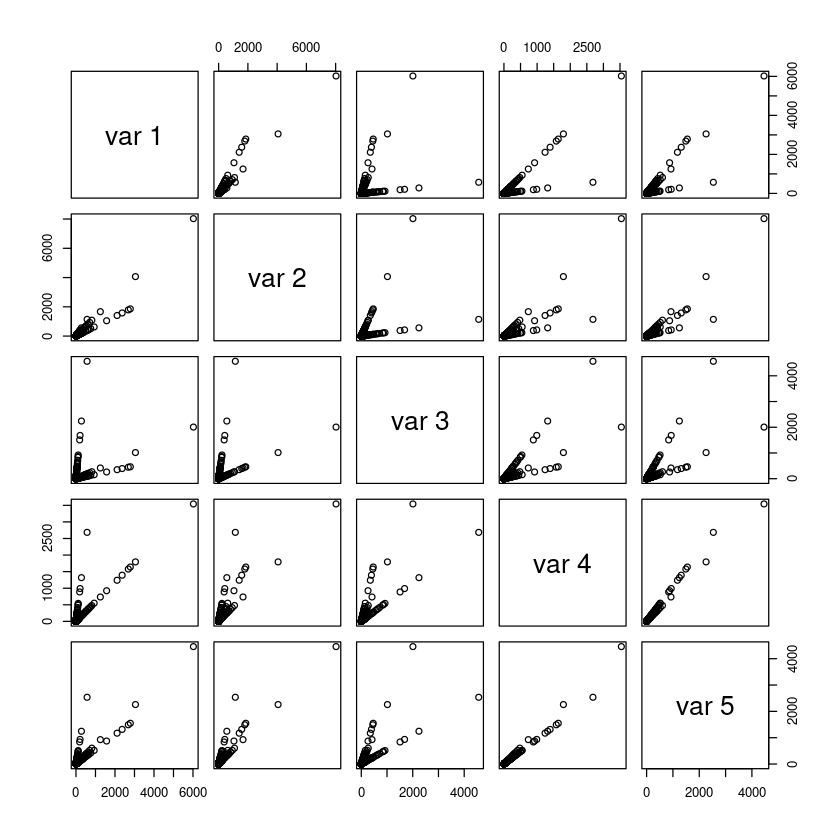

In [6]:
pairs(X1)

In [7]:
X1trafo <- transform_unitpareto(X1)

In [8]:
summary(rowSums(X1trafo))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    5.01     7.18    10.76    48.94    20.98 43333.33 

In [9]:
length(which(rowSums(X1trafo) > s))

[1] 251

In [10]:
maxPCAX1P1 <- max_stable_prcomp(X1trafo, p=1, s = s, n_initial_guesses = 2000)
maxPCAX1P2 <- max_stable_prcomp(X1trafo, p=2, s = s, n_initial_guesses = 2000)
maxPCAX1P3 <- max_stable_prcomp(X1trafo, p=3, s = s, n_initial_guesses = 2000)
maxPCAX1P4 <- max_stable_prcomp(X1trafo, p=4, s = s, n_initial_guesses = 2000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [11]:
maxPCAX1P3

$p
[1] 3

$d
[1] 5

$decoder_matrix
          [,1]      [,2]        [,3]
[1,] 0.9380538 0.6458099 0.038732557
[2,] 0.5140475 1.3992720 0.005354107
[3,] 0.0603517 0.2413090 1.004113364
[4,] 0.5873954 0.2920411 0.551231712
[5,] 0.5487811 0.8445708 0.511620327

$encoder_matrix
           [,1]      [,2]       [,3]       [,4]      [,5]
[1,] 1.06603690 0.4850825 0.04277587 0.09363207 0.1148865
[2,] 0.27217691 0.7146603 0.05218730 0.16973892 0.1615323
[3,] 0.05401354 0.1530416 0.99590326 0.20005038 0.2073836

$reconstr_matrix
           [,1]      [,2]       [,3]      [,4]      [,5]
[1,] 0.99999997 0.4615347 0.04012607 0.1096191 0.1077697
[2,] 0.54799357 1.0000042 0.07302423 0.2375109 0.2260277
[3,] 0.06567874 0.1724540 0.99999978 0.2008733 0.2082366
[4,] 0.62618519 0.2849352 0.54897346 0.1102741 0.1143164
[5,] 0.58502092 0.6035813 0.50952435 0.1433565 0.1364255

$loss_fctn_value
[1] 0.09029208

$optim_conv_status
[1] 4

$s
[1] 200

$starting_vals
$starting_vals$encoder_matrix_x0
          [,1

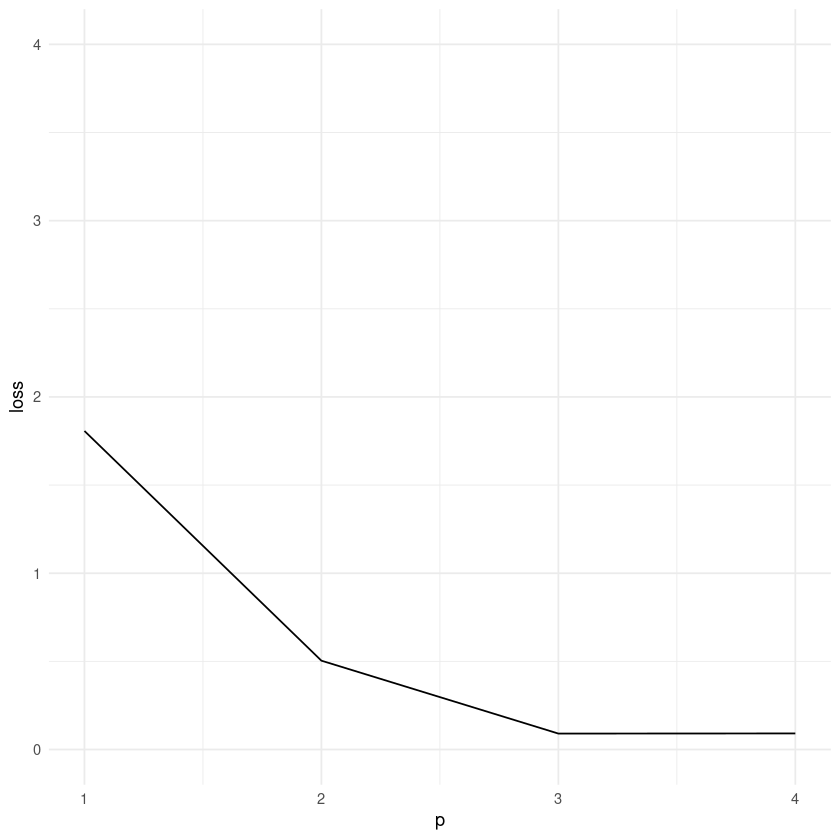

In [12]:
plotlossdatX1 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX1P1$loss_fctn_value,
        maxPCAX1P2$loss_fctn_value,
        maxPCAX1P3$loss_fctn_value,
        maxPCAX1P4$loss_fctn_value
    )
)

pe1 <- ggplot(aes(x = p, y = loss), data = plotlossdatX1) + geom_line() + ylim(0,4) + theme_minimal()
pe1

In [13]:
ggsave("mlm_lindep_elbow.png", pe1)

Saving 6.67 x 6.67 in image


In [14]:
rec1 <- t(maxmatmul(maxPCAX1P3$reconstr_matrix, t(X1)))

datX1 <- data.frame(X1)
datX1$is_rec = "original"
datrec1 <- data.frame(rec1)
datrec1$is_rec = "reconstruction"
names(datrec1) <- names(datX1)
plot_datX1 <- full_join(datX1, datrec1)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


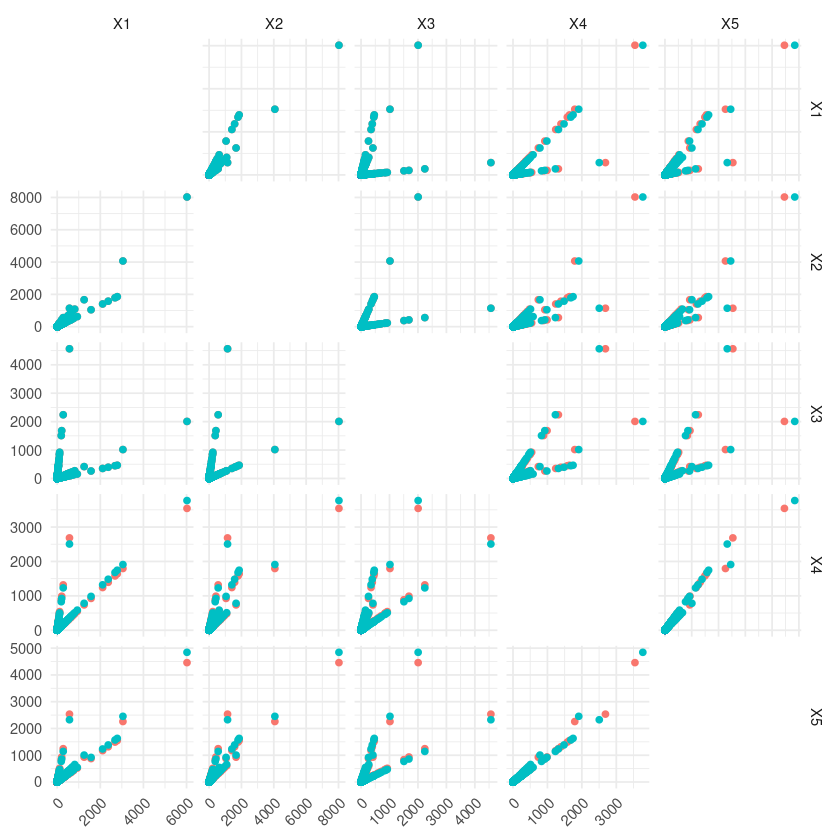

In [15]:
p1 <- ggpairs(
    plot_datX1, 
    aes(color = is_rec), 
    columns = 1:5,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))
p1

In [16]:
ggsave("mlm_lindep.png", p1)

Saving 6.67 x 6.67 in image


# Second matrix 

In [17]:
A2 <- matrix(
    c(
        2/3, 2/3, 0, 0, 1 / 5, 
        0, 1/3, 2/3, 1/3, 3 / 5, 
        1 / 3, 0, 1/3, 2/3, 1 / 5
     ), 
    5, 3
)

In [18]:
A2

0.6666667,0.0000000,0.3333333
0.6666667,0.3333333,0.0000000
0.0000000,0.6666667,0.3333333
0.0000000,0.3333333,0.6666667
0.2000000,0.6000000,0.2000000


In [19]:
Z2 <- matrix(rfrechet(30000), 10000, 3)
X2 <- t(maxmatmul(A2, t(Z2)))
X2trafo <- transform_unitpareto(X2)

In [20]:
length(which(rowSums(X2trafo) > s))

[1] 249

In [21]:
maxPCAX2P1 <- max_stable_prcomp(X2trafo, p=1, s = s, n_initial_guesses = 2000)
maxPCAX2P2 <- max_stable_prcomp(X2trafo, p=2, s = s, n_initial_guesses = 2000)
maxPCAX2P3 <- max_stable_prcomp(X2trafo, p=3, s = s, n_initial_guesses = 2000)
maxPCAX2P4 <- max_stable_prcomp(X2trafo, p=4, s = s, n_initial_guesses = 2000)

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.

For consistency with the rest of the package the inequality sign may be switched from >= to <= in a future nloptr version.



In [22]:
maxPCAX2P3

$p
[1] 3

$d
[1] 5

$decoder_matrix
             [,1]         [,2]         [,3]
[1,] 3.903128e-18 4.065758e-19 1.097537e+00
[2,] 5.092889e-01 4.029892e-01 9.356557e-01
[3,] 0.000000e+00 8.090772e-01 9.757820e-19
[4,] 3.112917e-03 4.238969e-01 0.000000e+00
[5,] 1.517759e+00 4.366488e-01 1.354780e-03

$encoder_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 1.531777e-01 0.1526630091 0.3071547419 5.554903e-02 6.588597e-01
[2,] 7.589415e-19 0.0006534268 1.2359587899 1.030386e-01 0.000000e+00
[3,] 9.111335e-01 0.0005148512 0.0003786959 2.385245e-18 8.673617e-19

$reconstr_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 1.000002e+00 0.0005650680 0.0004156326 2.617893e-18 2.571614e-18
[2,] 8.525072e-01 0.0777495786 0.4980780170 4.152344e-02 3.355499e-01
[3,] 8.890676e-19 0.0005286727 0.9999860914 8.336618e-02 8.463559e-37
[4,] 4.768295e-04 0.0004752272 0.5239191119 4.367774e-02 2.050975e-03
[5,] 2.324869e-01 0.2317056532 0.53

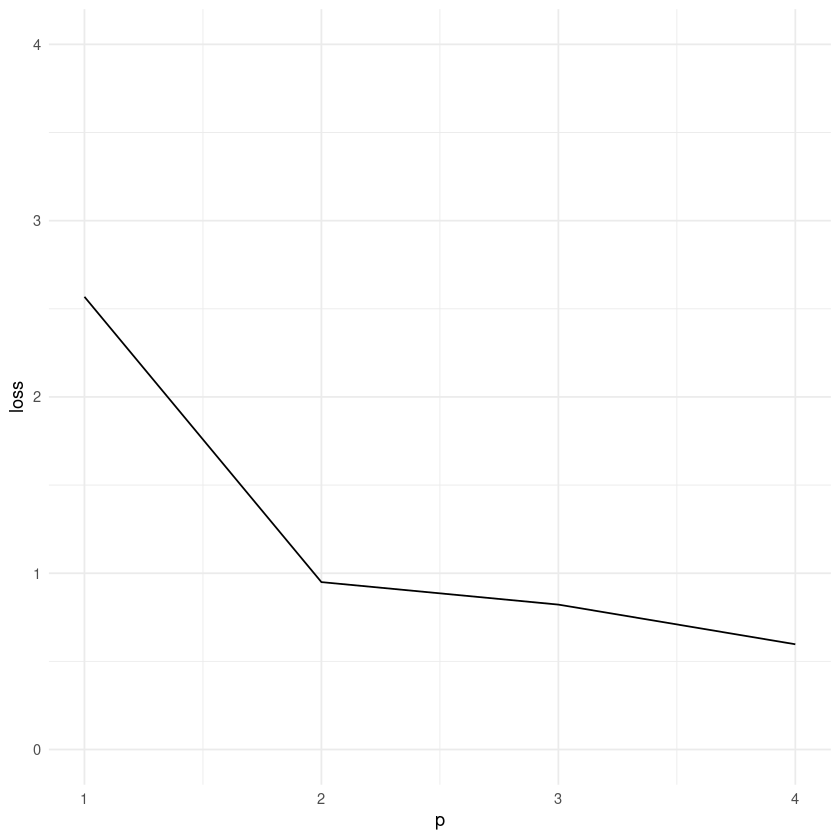

In [23]:
plotlossdatX2 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX2P1$loss_fctn_value,
        maxPCAX2P2$loss_fctn_value,
        maxPCAX2P3$loss_fctn_value,
        maxPCAX2P4$loss_fctn_value
    )
)

pe2 <- ggplot(aes(x = p, y = loss), data = plotlossdatX2) + geom_line() + ylim(0,4) + theme_minimal()
pe2

In [24]:
ggsave("mlm_nolindep_elbow.png", pe2)

Saving 6.67 x 6.67 in image


In [25]:
rec2 <- t(maxmatmul(maxPCAX2P3$reconstr_matrix, t(X2)))

datX2 <- data.frame(X2)
datX2$is_rec = "original"
datrec2 <- data.frame(rec2)
datrec2$is_rec = "reconstruction"
names(datrec2) <- names(datX2)
plot_datX2 <- full_join(datX2, datrec2)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


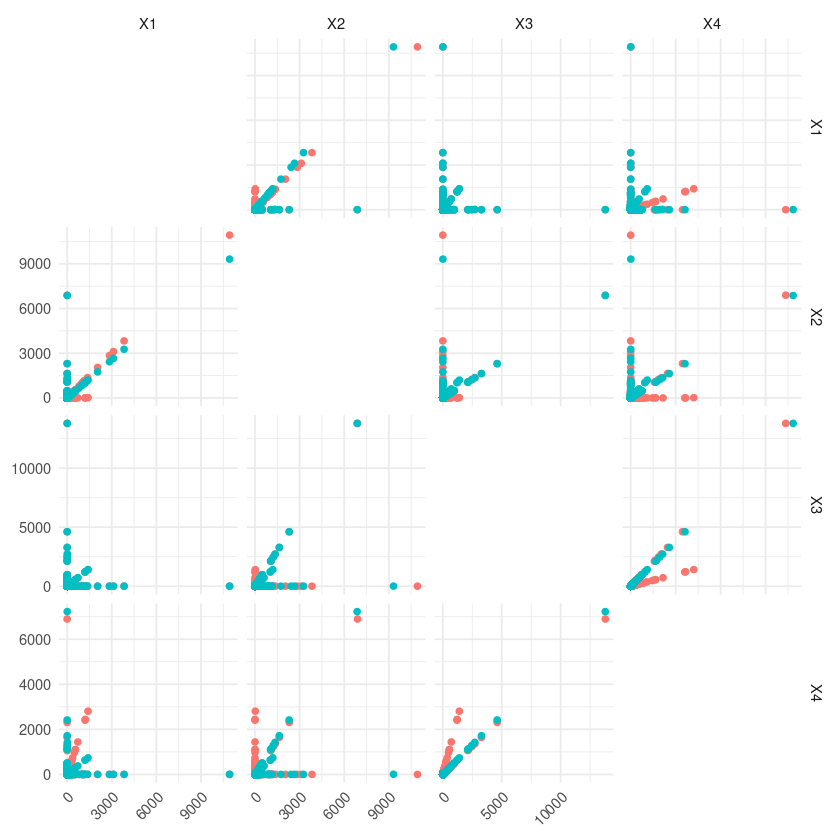

In [26]:
p2 <- ggpairs(
    plot_datX2, 
    aes(color = is_rec),
    columns = 1:4,
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p2

In [27]:
ggsave("mlm_nolindep.png", p2)

Saving 6.67 x 6.67 in image
